# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Disclaimer:** This notebook was AI-generated to help explore Dandiset 001333. It has not been fully verified by human experts. Please exercise caution when interpreting the code or results, and verify critical findings independently.

## Overview of the Dandiset

This notebook explores Dandiset [001333 (version 0.250327.2220)](https://dandiarchive.org/dandiset/001333/0.250327.2220), titled "Parkinson's Electrophysiological Signal Dataset (PESD)".

**Description from the DANDI Archive:**

> The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain.
>
> Beta ARV Signal: The controller beta values are determined by calculating the Average Rectified Value (ARV) of the beta band. This is achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev band-pass filter with an 8 Hz bandwidth, centered around the peak of the LFP power spectrum. Local Field Potential (LFP) - STN: Local Field Potentials are derived from the synchronized activity of neuron populations between the cortex, STN, and thalamus.
>
> More details can be found in our article named, “Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation”, available at https://arxiv.org/abs/2407.17756

**Citation:** Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD) (Version 0.250327.2220) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001333/0.250327.2220

## What this notebook covers

This notebook will guide you through:
1. Connecting to the DANDI Archive and accessing the Dandiset.
2. Listing some assets (files) within the Dandiset.
3. Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Inspecting basic metadata of the NWB file.
5. Exploring the structure of the NWB file, focusing on the electrodes table and Beta Band Voltage data.
6. Visualizing the Beta Band Voltage time series.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (a dependency for pynwb, for HDF5 file access)
- `remfile` (for streaming remote files)
- `numpy` (for numerical operations)
- `pandas` (for data manipulation, e.g., DataFrames)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced visualizations)

This notebook assumes these packages are already installed in your Python environment.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001333"
dandiset_version = "0.250327.2220"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Corrected from asset.identifier to asset.asset_id based on observed API

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset to explore its contents.
For this demonstration, we'll use the file: `sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb`.

The DANDI API provides a download URL for each asset. We will use this URL to stream the file.
The specific URL for our chosen asset (`b344c8b7-422f-46bb-b016-b47dc1e87c65`) is:
`https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/`

In [2]:
import pynwb
import h5py
import remfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the URL for the NWB file
# This URL corresponds to sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb
nwb_file_url = "https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/"

# Load the NWB file
# We use remfile.File to stream the HDF5 file directly from the URL
print(f"Loading NWB file from: {nwb_file_url}")
remote_nwb_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_nwb_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for PyNWB as well
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/



NWB file loaded successfully.
Identifier: 7a68ea11-865a-481a-a5fd-d91fe6def653
Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-03-27 16:53:27.990500-04:00
Experimenter: ('Ananna Biswas',)


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Explore the NWB file with Neurosift

You can also explore this NWB file interactively using Neurosift by following this link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/&dandisetId=001333&dandisetVersion=0.250327.2220](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/&dandisetId=001333&dandisetVersion=0.250327.2220)

## Summary of the NWB file contents

The loaded NWB file contains various types of information. We will focus on:

*   **General Metadata:** Such as session description, start time, experimenter details.
*   **Processing Data (`nwb.processing`):**
    *   The `ecephys` module contains processed electrophysiology data.
    *   Within `ecephys`, the `LFP` (Local Field Potential) data interface holds electrical series.
    *   One such series is `Beta_Band_Voltage`, which contains voltage measurements over time, filtered for the beta band.
*   **Electrodes Table (`nwb.electrodes`):** This table provides metadata about the electrodes used, including their location, group, and label.

### Electrodes Table

Let's display the electrodes table to see the metadata associated with each electrode.

In [3]:
electrodes_df = nwb.electrodes.to_dataframe()
print("Electrodes Table:")
# Display the full DataFrame, not just the head, as it's small
print(electrodes_df)

Electrodes Table:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   
5   Simulated Cortico-basal-ganglia network of brain   
6   Simulated Cortico-basal-ganglia network of brain   
7   Simulated Cortico-basal-ganglia network of brain   
8   Simulated Cortico-basal-ganglia network of brain   
9   Simulated Cortico-basal-ganglia network of brain   
10  Simulated Cortico-basal-ganglia network of brain   
11  Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeG

The table shows 12 electrodes, grouped into 4 shanks (shank0_elec0-2, shank1_elec0-2, etc.). The 'location' column indicates they are all within the "Simulated Cortico-basal-ganglia network of brain".

### Visualizing Beta Band Voltage

Now, let's load and visualize the `Beta_Band_Voltage` data. This is a time series representing the voltage in the beta frequency band.

Number of data points: 1400
Time range: 10.02 s to 38.00 s
Voltage data unit: volts


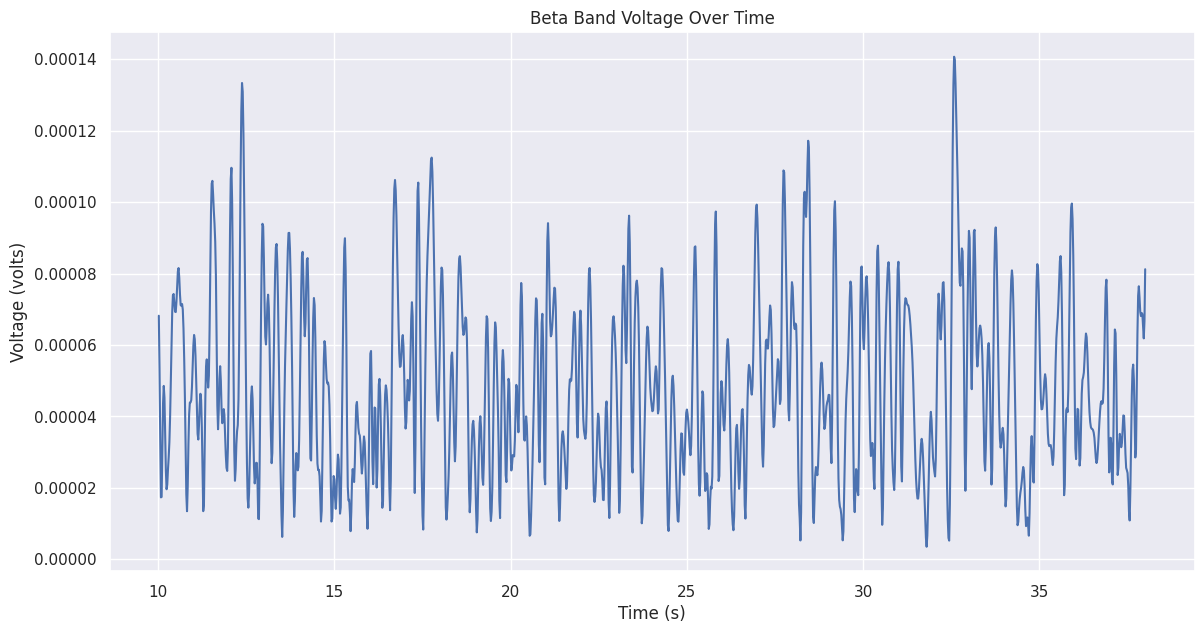

In [4]:
# Access the Beta_Band_Voltage electrical series
beta_band_voltage_series = nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]

# Get the data and timestamps
# We load all data points and timestamps for this example as the dataset is small.
# For larger datasets, you might want to select a subset.
voltage_data = beta_band_voltage_series.data[:]
timestamps = beta_band_voltage_series.timestamps[:]

print(f"Number of data points: {len(voltage_data)}")
print(f"Time range: {timestamps[0]:.2f} s to {timestamps[-1]:.2f} s")
print(f"Voltage data unit: {beta_band_voltage_series.unit}")

# Create the plot
sns.set_theme() # Apply seaborn styling
plt.figure(figsize=(14, 7))
plt.plot(timestamps, voltage_data)
plt.xlabel("Time (s)")
plt.ylabel(f"Voltage ({beta_band_voltage_series.unit})")
plt.title("Beta Band Voltage Over Time")
plt.grid(True)
plt.show()

The plot above shows the fluctuations in the beta band voltage over the duration of the recording segment. This type of signal is often analyzed for patterns related to brain states or neurological conditions.

## Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI archive and retrieve metadata for Dandiset 001333.
*   List assets within the Dandiset.
*   Load a specific NWB file (`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb`) by streaming it from its DANDI URL.
*   Inspect basic metadata and the structure of the NWB file.
*   View the electrodes table.
*   Plot the Beta Band Voltage time series.

**Possible Future Directions for Analysis:**

*   **Comparative Analysis:** Load and compare data from other NWB files in the Dandiset, for example, comparing "healthy-simulated-beta" with files from "parkinsonian-simulated-beta" if available and similarly structured (note: this Dandiset version seems to only contain "healthy-simulated" data in the first few assets listed, further exploration of all assets would be needed).
*   **Frequency Analysis:** Perform spectral analysis (e.g., using FFT) on the Beta Band Voltage or LFP data to examine power in different frequency bands.
*   **Statistical Analysis:** Calculate statistical measures of the signals, such as mean, variance, or characteristics of oscillations.
*   **Exploring other data types:** This Dandiset description mentions LFP signals in the time domain. One could load and analyze these raw LFP signals if they are present in other NWB files or other parts of this NWB file. The current NWB file primarily showcased the processed "Beta_Band_Voltage".

This notebook provides a starting point. Researchers can adapt and expand upon these examples to perform more in-depth analyses tailored to their specific research questions.

---
End of Notebook
---